# Bibliotheken laden
#### Daten-Upload

In [1]:
import pandas as pd

In [2]:
affinities = 'raw_data\Affinitaeten.csv'
sep = ';'
encoding="ISO-8859-1"

In [3]:
# Es werden nur die ersten zwei Zeilen geladen, um die Header-Struktur zu überprüfen
df = pd.read_csv(affinities, sep=sep, nrows=2, encoding=encoding)
cols = df.columns
df.head()

,Unnamed: 0,GeoId,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,...,Attr70,Attr71,Attr72,Attr73,Attr74,Attr75,Attr76,Attr77,Attr78,Attr79
0,1,fc3f49f4a1e3f928b3e98c606ccb1da2,0,1,1,6,1,0,2,1,...,9,3,4,0,1,0,0,2,7,4
1,2,fc19ae7cf6355599ca723f97daecdf06,0,2,1,3,1,0,2,2,...,4,7,2,0,0,0,0,2,6,2


In [4]:
# Hochladen von Daten ohne die erste Spalte
cols = df.columns
df = pd.read_csv(affinities, sep=sep, usecols=cols[1:], encoding=encoding)
df.head(3)

,GeoId,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr70,Attr71,Attr72,Attr73,Attr74,Attr75,Attr76,Attr77,Attr78,Attr79
0,fc3f49f4a1e3f928b3e98c606ccb1da2,0.0,1.0,1.0,6.0,1.0,0.0,2.0,1.0,4.0,...,9.0,3.0,4.0,0.0,1.0,0.0,0.0,2.0,7.0,4.0
1,fc19ae7cf6355599ca723f97daecdf06,0.0,2.0,1.0,3.0,1.0,0.0,2.0,2.0,6.0,...,4.0,7.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,2.0
2,5e4ec8e68ae5642f5aefc7c25ef2cf6e,0.0,2.0,1.0,3.0,1.0,0.0,2.0,2.0,6.0,...,1.0,9.0,2.0,0.0,0.0,0.0,0.0,3.0,8.0,2.0


# Basisinformationen zum Datensatz

In [5]:
# Datendimensionen
df.shape

(7303, 80)

In [6]:
# ob es leere Zellen gibt
df.isna().sum()

GeoId     0
Attr1     1
Attr2     1
Attr3     1
Attr4     1
         ..
Attr75    1
Attr76    1
Attr77    1
Attr78    1
Attr79    1
Length: 80, dtype: int64

In [7]:
# welche Zeilen leere Werte haben (NaN)
rows_with_nan = df.isna().any(axis=1)

In [8]:
# leere Zeilenindizes
rows_with_nan[rows_with_nan==True]

1516    True
dtype: bool

In [9]:
df.iloc[1515:1517,0:4]

,GeoId,Attr1,Attr2,Attr3
1515,f172c74bbeeab50d90b39787832132e4,0.0,4.0,2.0
1516,c7f66da1cae4f223b9bae717f05900f7,NaN,NaN,NaN


Der GeoId-Wert = 'c7f66da1cae4f223b9bae717f05900f7' mit leeren Werten entspricht genau dem GeoId-Wert aus der Datei 'Kundensicht.csv', für die kein Ort angegeben wurde.

In [10]:
# Zeile löschen
df.drop(1516, axis=0, inplace=True)

In [11]:
# Auf Duplikate prüfen
duplicates = df.duplicated()
duplicates.any()

False

# Teilen Sie den Satz in kleinere Teile und die Daten überprüfen

In [12]:
df_part1 = df.iloc[:, 1:20]
df_part2 = df.iloc[:, 20:40]
df_part3 = df.iloc[:, 40:60]
df_part4 = df.iloc[:, 60:]

In [13]:
df_part1.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19
count,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000
mean,0.157080,2.187072,1.248836,3.826623,0.830731,0.006300,1.684196,2.185566,4.733224,0.006163,1.118324,1.091756,3.197891,3.830184,2.229115,1.978773,1.736784,2.929745,0.163380
std,0.577251,4.376045,0.608895,1.522533,0.375015,0.079125,0.558796,0.555082,1.736999,0.078266,0.338339,1.486115,1.196090,1.475241,0.767053,0.852312,0.996645,0.315547,0.369737
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,1.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,2.000000,2.000000,4.000000,0.000000,1.000000,1.000000,3.000000,4.000000,2.000000,2.000000,1.000000,3.000000,0.000000
75%,0.000000,2.000000,1.000000,5.000000,1.000000,0.000000,2.000000,3.000000,6.000000,0.000000,1.000000,2.000000,4.000000,5.000000,3.000000,2.000000,2.000000,3.000000,0.000000
max,15.000000,171.000000,5.000000,7.000000,1.000000,1.000000,3.000000,4.000000,7.000000,1.000000,3.000000,10.000000,5.000000,6.000000,3.000000,5.000000,4.000000,3.000000,1.000000


#### Die Spalten Attr1 und Attr2 haben eine „verdächtige“ Verteilung. Der Abstand zwischen Minimal- und Maximalwert ist groß (insbesondere für Attr2).

In [14]:
unique_values_attr1 = df['Attr1'].unique()
unique_values_attr2 = df['Attr2'].unique()

In [15]:
print(f"Eindeutige Werte für die Spalte Attr1: {sorted(unique_values_attr1)}")

Eindeutige Werte für die Spalte Attr1: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 13.0, 15.0]


In [16]:
print(f"Eindeutige Werte für die Spalte Attr2: {sorted(unique_values_attr2)}")

Eindeutige Werte für die Spalte Attr2: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 33.0, 36.0, 39.0, 44.0, 60.0, 62.0, 65.0, 73.0, 74.0, 88.0, 113.0, 121.0, 171.0]


In [17]:
value_counts_attr1 = df['Attr1'].value_counts()
value_counts_attr2 = df['Attr2'].value_counts()

In [18]:
print(f"Anzahl der Werte für die Spalte Attr1:")
print(value_counts_attr1)

Anzahl der Werte für die Spalte Attr1:
Attr1
0.0     6475
1.0      654
2.0      107
3.0       36
4.0       18
8.0        3
9.0        2
5.0        2
6.0        2
13.0       1
7.0        1
15.0       1
Name: count, dtype: int64


In [19]:
print(f"Anzahl der Werte für die Spalte Attr2:")
print(value_counts_attr2)

Anzahl der Werte für die Spalte Attr2:
Attr2
1.0      4938
2.0      1066
3.0       342
4.0       231
5.0       139
6.0       123
7.0        83
8.0        62
10.0       56
9.0        53
11.0       41
0.0        37
13.0       21
12.0       18
18.0       14
15.0       14
19.0       13
17.0        9
20.0        8
14.0        6
24.0        2
23.0        2
33.0        2
27.0        2
21.0        1
113.0       1
29.0        1
39.0        1
60.0        1
171.0       1
28.0        1
65.0        1
22.0        1
44.0        1
25.0        1
36.0        1
74.0        1
30.0        1
121.0       1
73.0        1
26.0        1
88.0        1
62.0        1
16.0        1
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

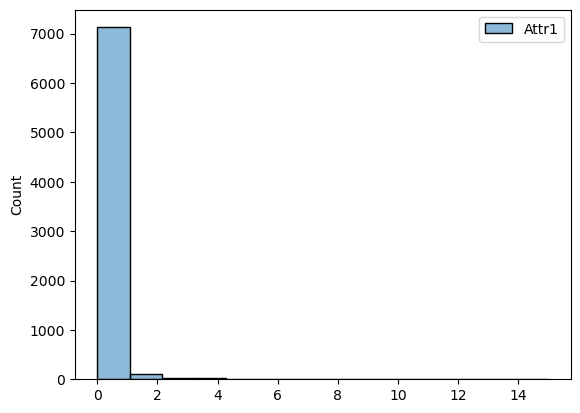

In [21]:
sns.histplot(df[['Attr1']])
plt.show()

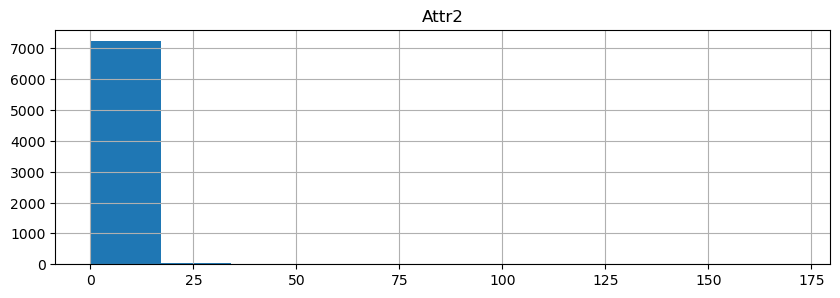

In [22]:
df[['Attr2']].hist(bins=10, layout=(2,1), figsize=(10, 7))
plt.show()

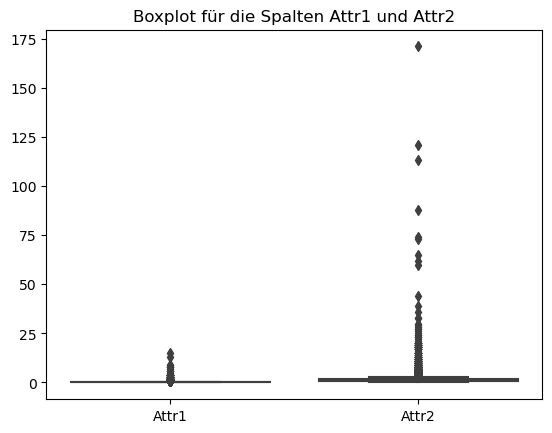

In [23]:
sns.boxplot(data=df[['Attr1', 'Attr2']])
plt.title("Boxplot für die Spalten Attr1 und Attr2")
plt.show()

In [24]:
df_part2.describe()

,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39
count,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000
mean,3.296083,3.018625,0.015612,6.025883,5.038346,5.980005,6.146809,5.051767,0.052725,0.106820,0.648452,1.961654,4.830457,1.171186,3.081621,6.907833,6.563544,5.666941,5.091756,5.507669
std,1.056795,1.447500,0.123978,2.612333,2.441123,2.563509,2.616067,2.342196,0.223500,0.484336,0.477486,1.349655,2.598718,0.508255,1.183213,2.088278,2.090934,2.562892,2.659010,2.685166
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,0.000000,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,6.000000,5.000000,4.000000,3.000000,3.000000
50%,3.000000,3.000000,0.000000,7.000000,5.000000,6.000000,7.000000,5.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,3.000000,7.000000,7.000000,6.000000,5.000000,6.000000
75%,4.000000,4.000000,0.000000,8.000000,7.000000,8.000000,8.000000,7.000000,0.000000,0.000000,1.000000,2.000000,7.000000,1.000000,4.000000,9.000000,8.000000,8.000000,8.000000,8.000000
max,5.000000,5.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,4.000000,1.000000,6.000000,9.000000,3.000000,5.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [25]:
df_part3.describe()

,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59
count,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000
mean,6.777184,6.294166,5.582306,4.897151,4.848261,4.068200,5.230348,5.877020,6.454259,5.052314,6.408929,5.509176,5.162695,5.515338,6.253081,6.461517,6.238565,6.095179,6.147768,5.339907
std,2.088918,2.139887,2.509809,2.525632,2.380003,2.195363,2.608777,2.587824,2.254346,2.580362,2.588283,2.559386,2.636773,2.565237,2.251369,2.094163,2.287943,2.341214,2.241041,2.488058
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,5.000000,3.000000,5.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000
50%,7.000000,7.000000,6.000000,5.000000,5.000000,4.000000,6.000000,6.000000,7.000000,5.000000,7.000000,6.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000
75%,9.000000,8.000000,8.000000,7.000000,7.000000,6.000000,7.000000,8.000000,8.000000,7.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [26]:
df_part4.describe()

,Attr60,Attr61,Attr62,Attr63,Attr64,Attr65,Attr66,Attr67,Attr68,Attr69,Attr70,Attr71,Attr72,Attr73,Attr74,Attr75,Attr76,Attr77,Attr78,Attr79
count,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000,7302.000000
mean,6.290468,6.395919,5.754451,5.130101,5.739113,5.674062,7.287866,3.694193,6.015612,6.962476,5.114626,5.592988,3.779239,0.121884,0.096549,0.433169,0.219940,3.318680,5.721172,2.266228
std,2.434090,1.993222,2.485645,2.851634,2.679727,2.478403,1.941936,2.093622,2.399557,2.072898,2.662782,2.623223,2.268334,0.327175,0.295363,0.495547,0.414234,1.139342,2.563809,1.194223
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,2.000000,3.000000,4.000000,6.000000,2.000000,4.000000,6.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000
50%,7.000000,7.000000,6.000000,5.000000,6.000000,6.000000,8.000000,3.000000,6.000000,8.000000,5.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,2.000000
75%,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,5.000000,8.000000,9.000000,8.000000,8.000000,5.000000,0.000000,0.000000,1.000000,0.000000,4.000000,8.000000,3.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,5.000000,9.000000,5.000000


# Speichern des aktuellen DataFrame in einer CSV-Datei

In [27]:
df.to_csv('clean_raw_data\Affinitaeten.csv', index=False)